# <span style="color:Orange"> Final Project </span>

In [77]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## <span style="color:red"> Solving 1-d Schrödinger  equation by the shooting method </span>
Use Runge-Kutta (4th order) method to solve a one-dimensional double-well problem  
![Schrod_eq](images/diff.png)
where the atomic unit (a.u.) is used.  The potential V is a double-well (as shown below)  
![Schrod_eq](images/v.png)
with a=2 and b=8.  

a)	Find all the energy eigenvalues below zero (ε < 0). (at least 4 significant figures)  
b)	plot the lowest two states (orthonormal wave functions) together with V(x) in (-2.5<x<2.5).  
c)	Discuss that if V(x) is approximated as a simple harmonic oscillator around x0, where x0  
is one of the two bottoms, what kind of structures for the energy eigenvalues and wavefunctions   
will be. Compared (qualitatively) with your results from a) and b).   

Please use the general format we used in other projects for the report.  
![Schrod_eq](images/v_plot.png)

### <span style="color:skyblue"> Solution </span>

![Schrod_eq](images/solu.png)

![Schrod_eq](images/solu2.png)

In [78]:
coeff = [2, 0, -8, 0, 0]
np.roots(coeff)

# coeff = [1, 5, 6]
# np.roots(coeff)

array([ 2., -2.,  0.,  0.])

In [79]:
import scipy.optimize
def V(x): return 2*x**4-8*x**2
max_x = scipy.optimize.fmin(lambda x: V(x), 0)

Optimization terminated successfully.
         Current function value: -8.000000
         Iterations: 26
         Function evaluations: 52


In [80]:
def func(x):
    return 2*x**4-8*x**2
import numpy as np
func(np.sqrt(2))

-8.000000000000002

In [83]:
################################################################################
######################## RK_4th ################################################
def RK_4th(a, b, h, d2y, ya, d1ya, plot_enabled = True, normalized = False, label = None):
    
    """
    General info:
        This function solves 2nd order differential equation using 4th order
        runge kutta method.
    Arguments:
        a    : lower limit
        b    : higher limit
        h    : interval length (dx)
        d2y  : function handle to 2nd derivative of y
        ya   : value of y   at starting point a
        d1ya : value of d1y at starting point a
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    
    def d1y(x, y, z):
        return z

    xpoints = np.arange(a,b,h)
    ypoints = []
    zpoints = []

    y = ya
    z = d1ya

    for x in xpoints:
        ypoints.append(y)
        zpoints.append(d1y)

        k1 = h * d1y(x, y, z)
        l1 = h * d2y(x, y, z)

        k2 = h * d1y(x+0.5*h, y+0.5*k1, z+0.5*l1)
        l2 = h * d2y(x+0.5*h, y+0.5*k1, z+0.5*l1)

        k3 = h * d1y(x+0.5*h, y+0.5*k2, z+0.5*l2)
        l3 = h * d2y(x+0.5*h, y+0.5*k2, z+0.5*l2)

        k4 = h * d1y(x+h, y+k3, z+l3)
        l4 = h * d2y(x+h, y+k3, z+l3)

        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        z = z + (l1 + 2*l2 + 2*l3 + l4) / 6
        
    if normalized:
        
        ypoints_sqr = np.square(ypoints)
        # Calculating integration >>
        f_a = ypoints_sqr[0]
        f_b = ypoints_sqr[-1]
        I_n = (f_a + f_b) / 2
        
        # Loop for adding n-1 terms >>
        for ypoint_sqr in ypoints_sqr[1:-1]:
            I_n = I_n + ypoint_sqr * abs(h)
        # print("I_n =", I_n)
        ypoints = ypoints / np.sqrt(I_n)
        y       = y       / np.sqrt(I_n)
        z       = z       / np.sqrt(I_n)
    
    if plot_enabled == True:
        
        # Plotting R_average vs N for many trials >>
        fig  = plt.figure(figsize = (8, 5))
        axes = plt.gca()
        if label: axes.plot(xpoints, ypoints, label = label); plt.legend()
        else: axes.plot(xpoints, ypoints)

        # Setting plot elements >>
        axes.set_title("Y (wave-function) vs x")
        axes.set_xlabel("X")
        axes.set_ylabel("Y (wave-function)")
        plt.show()
        return y, z, axes
    
    else:
        return y, z, None
######################## RK_4th ################################################
################################################################################

In [84]:
def plot_wavefunc_with_V( func_V,
                          axes_wavefunc,
                          figsize  = (8, 6),
                          rangex_V = (-2.5, 2.5),
                          xlim     = None,
                          ylim     = None
                        ):
    
    import numpy as np

    # Making new figure for V >>
    fig    = plt.figure(figsize = figsize)
    axes_V = plt.gca()
    xpoints_V = np.linspace(rangex_V[0], rangex_V[1], num = 200)
    ypoints_V = func_V(xpoints_V)
    axes_V.plot(xpoints_V, ypoints_V)

    if type(axes_wavefunc) == list:
        for ax_wavefunc in axes_wavefunc:
            # Adding wave-functions plot to V figure >>
            xydata_wavefunc  = ax_wavefunc.get_lines()[0].get_xydata()
            xpoints_wavefunc = xydata_wavefunc[:, 0]
            ypoints_wavefunc = xydata_wavefunc[:, 1]
            axes_V.plot(xpoints_wavefunc, ypoints_wavefunc)
            
    else:
        ax_wavefunc = axes_wavefunc
        xydata_wavefunc  = ax_wavefunc.get_lines()[0].get_xydata()
        xpoints_wavefunc = xydata_wavefunc[:, 0]
        ypoints_wavefunc = xydata_wavefunc[:, 1]
        axes_V.plot(xpoints_wavefunc, ypoints_wavefunc)
    
    # Setting plot elements >>
    axes_V.set_title("Y (wave-function) vs x")
    axes_V.set_xlabel("X")
    axes_V.set_ylabel("Y (wave-function)")
    if xlim: axes_V.set_xlim(xlim)
    if ylim: axes_V.set_ylim(ylim)
    plt.show()
    
    return None

## Simple Harmonic Oscillator

In [85]:
def V(x):
    return 1/2*x**2

def d2y(x, y, z):
    n = 2; h = 1; w = 1
    E = (n + 0.5) * h * w
    return 2*(V(x)-E) * y

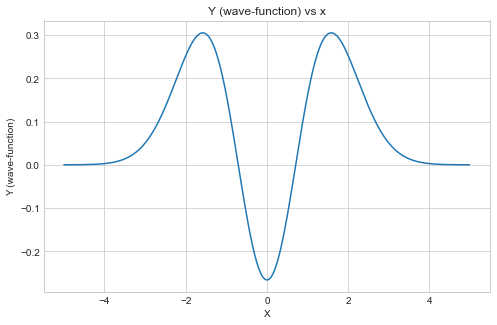

In [86]:
_, _, axes_sh = RK_4th( a          = -5,
                        b          =  5,
                        h          = 0.01,
                        d2y        = d2y,
                        ya         = 0.0001,
                        d1ya       = 0,
                        normalized = False )

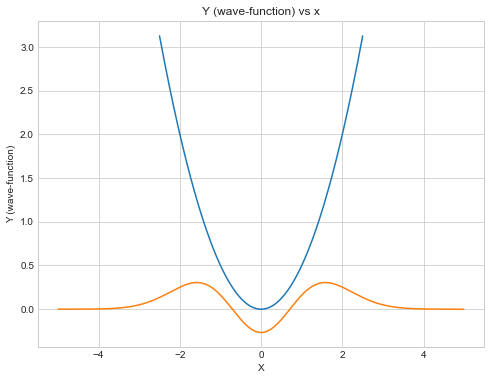

In [87]:
plot_wavefunc_with_V( func_V        = V,
                      axes_wavefunc = axes_sh,
                      figsize       = (8, 6),
                      rangex_V      = (-2.5, 2.5) )

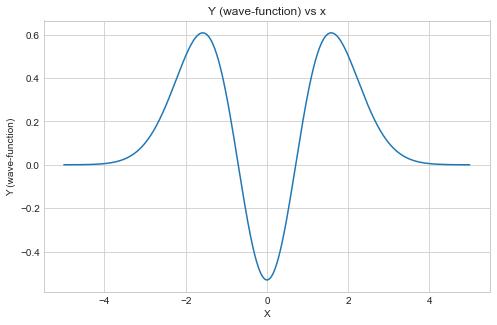

In [88]:
_, _, axes_sh_norm = RK_4th( a          = -5,
                             b          =  5,
                             h          = 0.01,
                             d2y        = d2y,
                             ya         = 0.0001,
                             d1ya       = 0,
                             normalized = True )

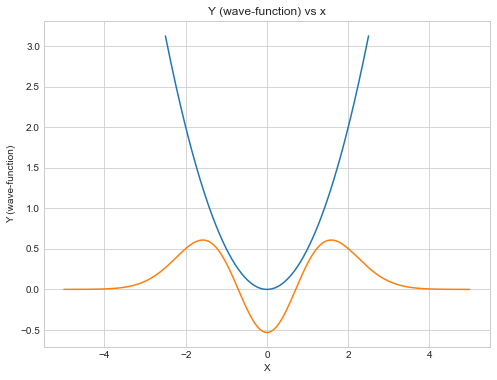

In [89]:
plot_wavefunc_with_V( func_V        = V,
                      axes_wavefunc = axes_sh_norm,
                      figsize       = (8, 6),
                      rangex_V      = (-2.5, 2.5))

In [109]:
################################################################################
######################## solve_schrod_RK_4th ###################################
def solve_schrod_RK_4th(a, b, h, d2y, ya, d1ya, El, Eh, dE, xlim = None, ylim = None, match_ratio = 0.1, normalized = True):
    
    """
    General info:
        This function solves schrodinger's equation using 4th order
        runge kutta method.
    Arguments:
        a    : lower limit of x
        b    : upper limit of x
        h    : interval length (dx)
        d2y  : function handle to 2nd derivative of wave function y
        ya   : value of wave function y at starting point a
        d1ya : value of 1st derivative of wave function y at starting point a
        El   : Lower limit of energy
        Eh   : Upper limit of energy
    """
    
    import numpy as np
    from progressbar import ProgressBar
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    
    global E
    energies = np.arange(El, Eh, dE)
    axes_sol = []
    
    diff_y1_y_ratios = []
    eigen_values     = []
    
    pbar = ProgressBar()
    i = 0
    for E in pbar(energies):
        # i = i + 1
        
        ya_left = (-1)**(i)*ya
        y_L, z_L, _ = RK_4th( a, (b - (a+b)/2) * 0.05,  h, d2y, ya_left, d1ya, plot_enabled = False, normalized = normalized )
        y_R, z_R, _ = RK_4th( b, (b - (a+b)/2) * 0.05, -h, d2y, ya,      d1ya, plot_enabled = False, normalized = normalized )
        
        y1_y_ratio = abs(z_L/y_L - z_R/y_R)
        
        if y1_y_ratio < match_ratio:
            print("")
            print("i           =", i)
            print("E           =", E)
            print("match ratio =", y1_y_ratio)
            y, _, ax_sol = RK_4th( a, b, h, d2y, ya_left, d1ya, plot_enabled = True, normalized = normalized, label = "nodes = " + str(i) )
            axes_sol.append(ax_sol)
            eigen_values.append(E)
            i = i + 1
        
        diff_y1_y_ratios.append(y1_y_ratio)
    
    fig  = plt.figure(figsize = (8, 6))
    axes = plt.gca()
    if xlim: axes.set_xlim(xlim)
    if ylim: axes.set_ylim(ylim)
    axes.plot(energies, diff_y1_y_ratios)
    axes.set_title("(y1/y)L - (y1/y)R   vs   Eigen-energies")
    axes.set_xlabel("Eigen-energies")
    axes.set_ylabel("(y1/y)L - (y1/y)R")
    
    return eigen_values, axes_sol
######################## solve_schrod_RK_4th ###################################
################################################################################

## Simple Harmonic Oscillator

In [110]:
def V(x):
    return 1/2*x**2

def d2y(x, y, z):
    return 2*(V(x)-E) * y


i           = 0
E           = 0.5
match ratio = 1.0542358652720907e-10


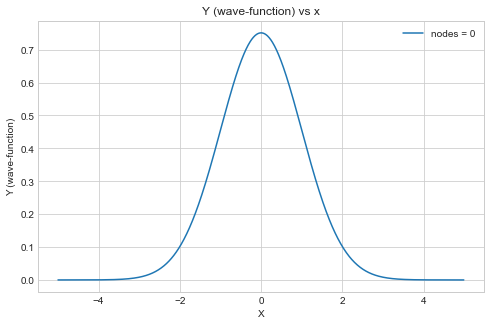


i           = 1
E           = 1.5
match ratio = 9.278843116078406e-08


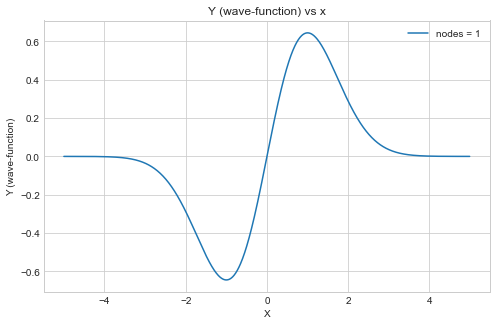


i           = 2
E           = 2.5
match ratio = 8.428549522765394e-07


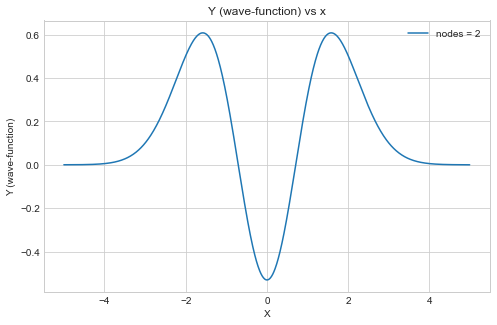


i           = 3
E           = 3.5
match ratio = 2.8401224464680297e-05


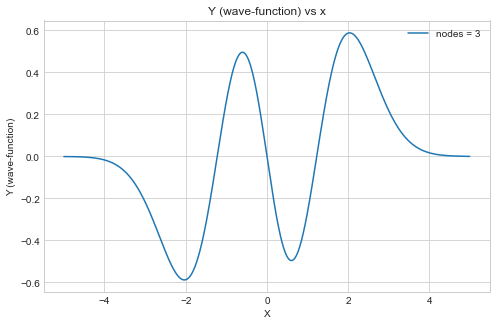


i           = 4
E           = 4.5
match ratio = 0.0002411193939604317


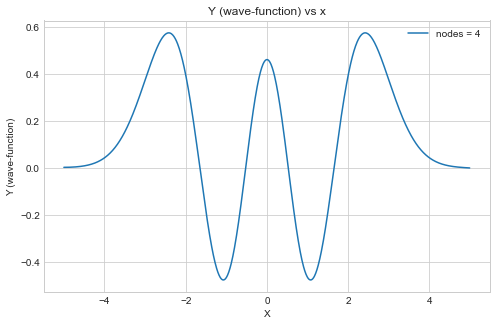

100% |########################################################################|


eigen_values:  [0.5, 1.5, 2.5, 3.5, 4.5]


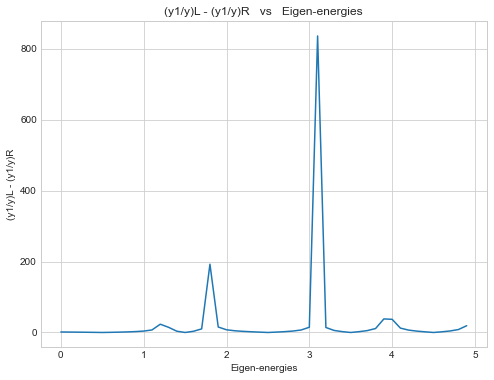

In [111]:
eigen_values, axes_sh = solve_schrod_RK_4th( a    = -5,
                                             b    =  5,
                                             h    = 0.01,
                                             d2y  = d2y,
                                             ya   = 0.0001,
                                             d1ya = 0,
                                             El   = 0,
                                             Eh   = 5,
                                             dE   = 0.1,
                                             match_ratio = 0.01,
                                             normalized = True )
                                             # xlim = None,
                                             # ylim = (0, 10) )

print("eigen_values: ", eigen_values)

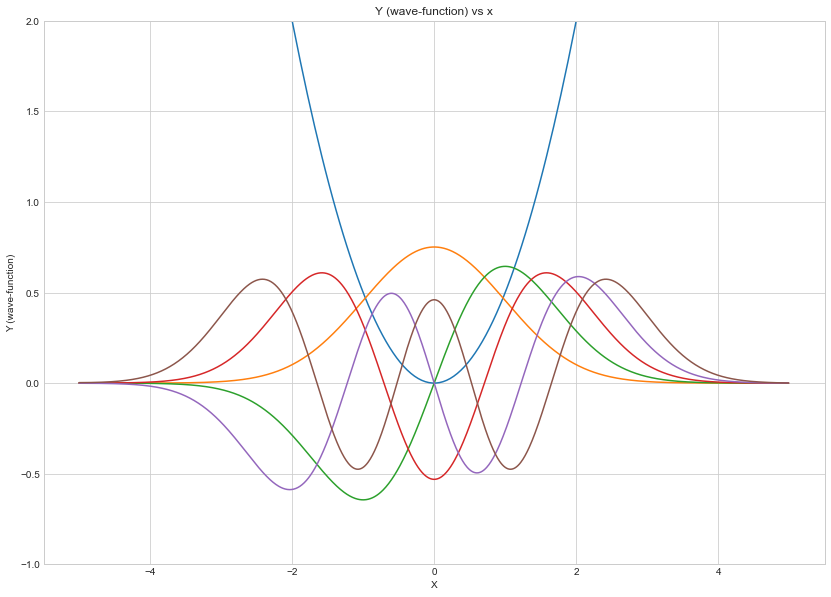

In [112]:
plot_wavefunc_with_V( func_V        = V,
                      axes_wavefunc = axes_sh,
                      figsize       = (14, 10),
                      rangex_V      = (-5, 5),
                      ylim          = (-1, 2,)
                    )

## Double Well Potential

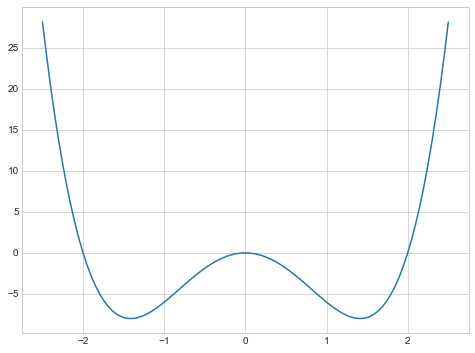

In [95]:
def V(x):
    return 2*x**4 - 8*x**2

def d2y(x, y, z):
    return 2*(V(x)-E) * y

fig  = plt.figure(figsize = (8, 6))
axes = plt.gca()
xpoints = np.linspace(-2.5, 2.5, num = 100)
ypoints = V(xpoints)
axes.plot(xpoints, ypoints)

### Project Problem (-8, 0)

In [ ]:
def V(x):
    return 2*x**4 - 8*x**2

def d2y(x, y, z):
    return 2*(V(x)-E) * y

eigen_values, axes_doublewell = solve_schrod_RK_4th( a    = -2.5,
                                                     b    =  2.5,
                                                     h    = 0.01,
                                                     d2y  = d2y,
                                                     ya   = 0.0001,
                                                     d1ya = 0,
                                                     El   = -8,
                                                     Eh   = 0,
                                                     dE   = 0.001,
                                                     match_ratio = 0.1,
                                                     # xlim = None,
                                                     ylim = (0, 10) )

## Project Problem (-5.5, -5.2)


i           = 0
E           = -5.325000000000004
match ratio = 0.2870951937396351


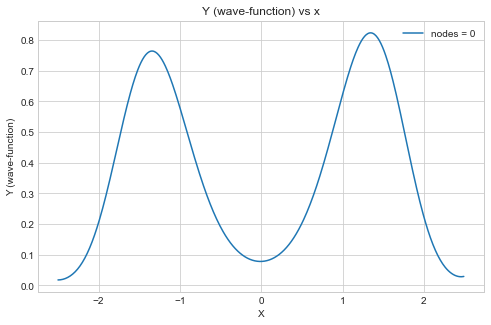


i           = 1
E           = -5.305000000000004
match ratio = 0.3371800229401938


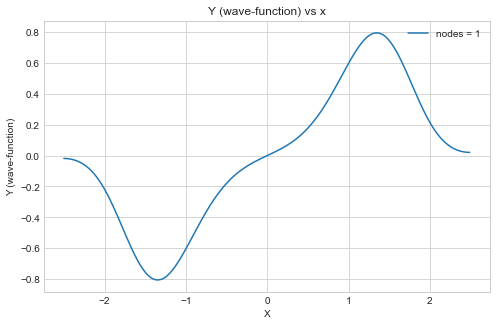

100% |########################################################################|


[-5.325000000000004, -5.305000000000004]

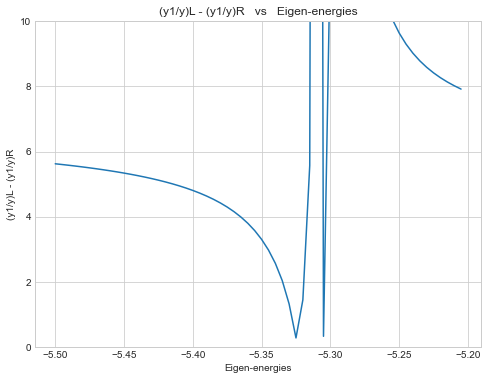

In [98]:
eigen_values, axes_doublewell_1_2 = solve_schrod_RK_4th( a    = -2.5,
                                                     b    =  2.5,
                                                     h    = 0.01,
                                                     d2y  = d2y,
                                                     ya   = 0.0001,
                                                     d1ya = 0,
                                                     El   = -5.5,
                                                     Eh   = -5.2,
                                                     dE   = 0.005,
                                                     match_ratio = 0.4,
                                                     ylim = (0, 10) )

eigen_values

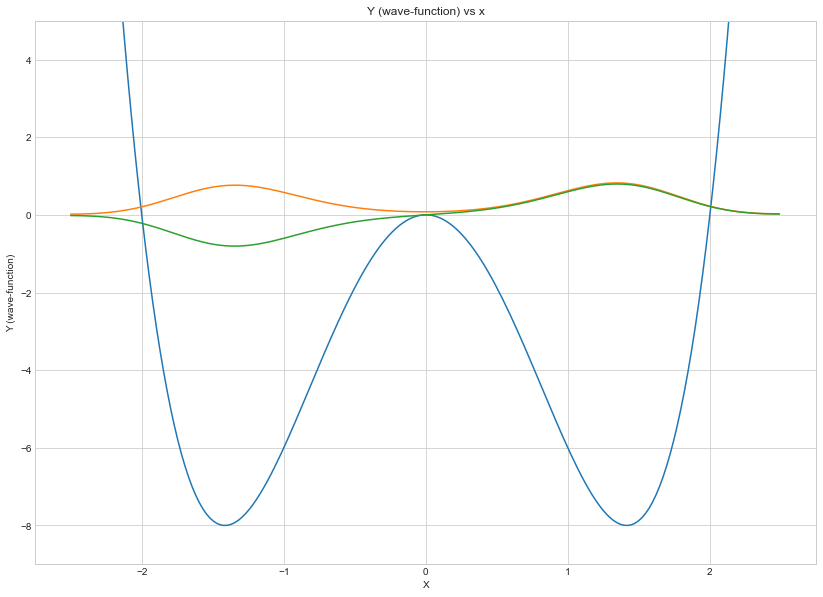

In [97]:
plot_wavefunc_with_V( func_V        = V,
                      axes_wavefunc = axes_doublewell_1_2,
                      figsize       = (14, 10),
                      rangex_V      = (-2.5, 2.5),
                      ylim          = (-9, 5)
                    )

## Project Problem (-1.5, -1)


i           = 0
E           = -1.0199999999999996
match ratio = 0.01922916447182557


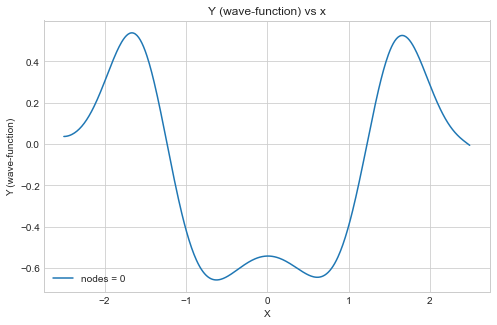

100% |########################################################################|


[-1.0199999999999996]

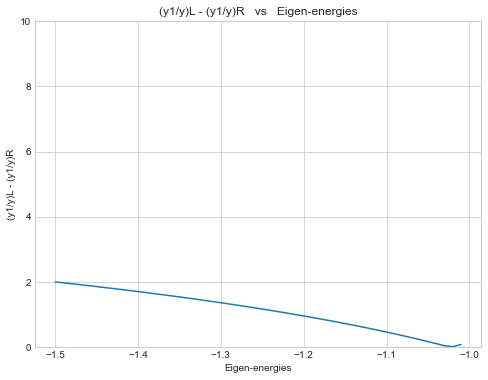

In [99]:
eigen_values, axes_doublewell_3 = solve_schrod_RK_4th( a    = -2.5,
                                                     b    =  2.5,
                                                     h    = 0.01,
                                                     d2y  = d2y,
                                                     ya   = 0.0001,
                                                     d1ya = 0,
                                                     El   = -1.5,
                                                     Eh   = -1,
                                                     dE   = 0.01,
                                                     match_ratio = 0.04,
                                                     ylim = (0, 10) )

eigen_values

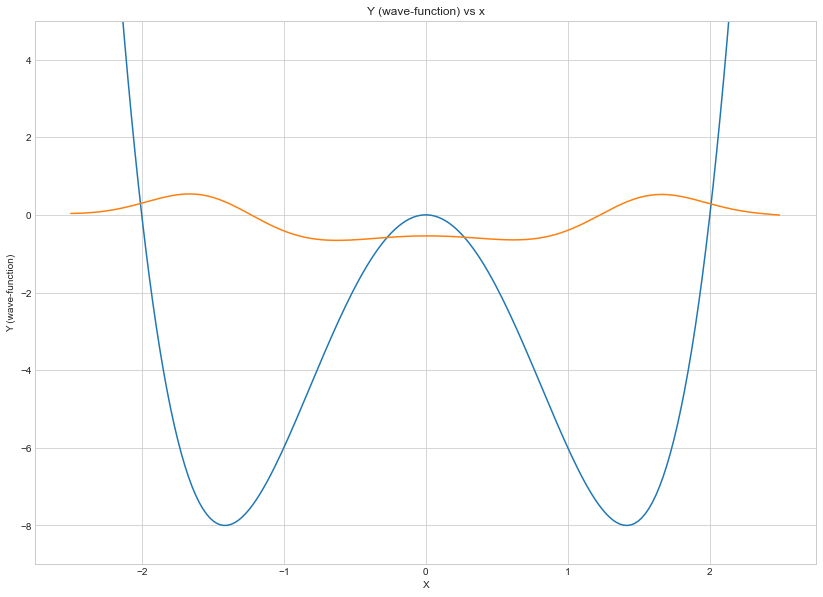

In [100]:
plot_wavefunc_with_V( func_V        = V,
                      axes_wavefunc = axes_doublewell_3,
                      figsize       = (14, 10),
                      rangex_V      = (-2.5, 2.5),
                      ylim          = (-9, 5)
                    )

## Project Problem (-0.5, 0)


i           = 0
E           = -0.3769999999999999
match ratio = 0.016790585936670155


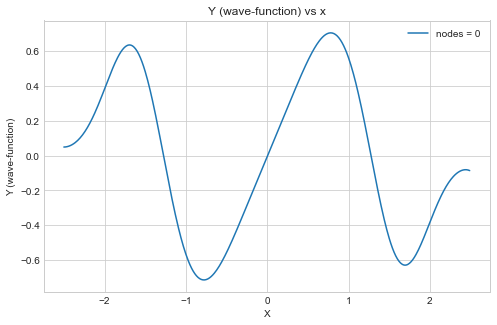

100% |########################################################################|


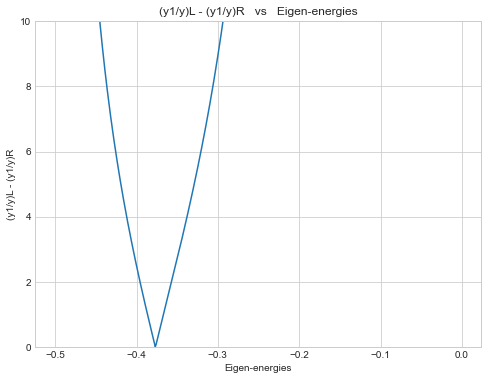

In [101]:
eigen_values, axes_doublewell_4 = solve_schrod_RK_4th( a    = -2.5,
                                                     b    =  2.5,
                                                     h    = 0.01,
                                                     d2y  = d2y,
                                                     ya   = 0.0001,
                                                     d1ya = 0,
                                                     El   = -0.5,
                                                     Eh   = 0,
                                                     dE   = 0.001,
                                                     match_ratio = 0.02,
                                                     # xlim = None,
                                                     ylim = (0, 10) )

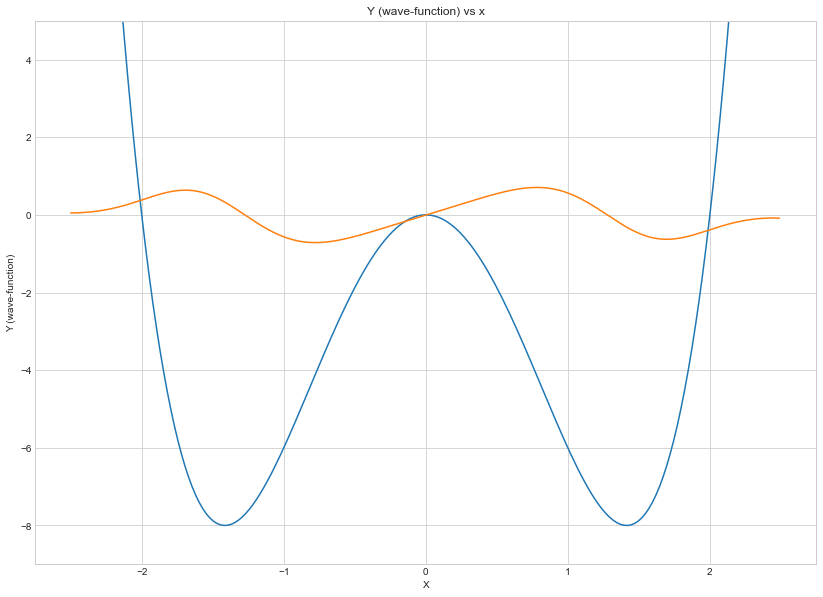

In [102]:
plot_wavefunc_with_V( func_V        = V,
                      axes_wavefunc = axes_doublewell_4,
                      figsize       = (14, 10),
                      rangex_V      = (-2.5, 2.5),
                      ylim          = (-9, 5)
                    )

## <span style="color:green"> Final Solution Problem 1</span>

### <span style="color:skyblue"> Eigen-Values</span>
### 1. -5.325000000000004
### 2. -5.305000000000004
### 3. -1.0199999999999996
### 4. -0.3769999999999999

### <span style="color:skyblue"> Eigen wave functions</span>

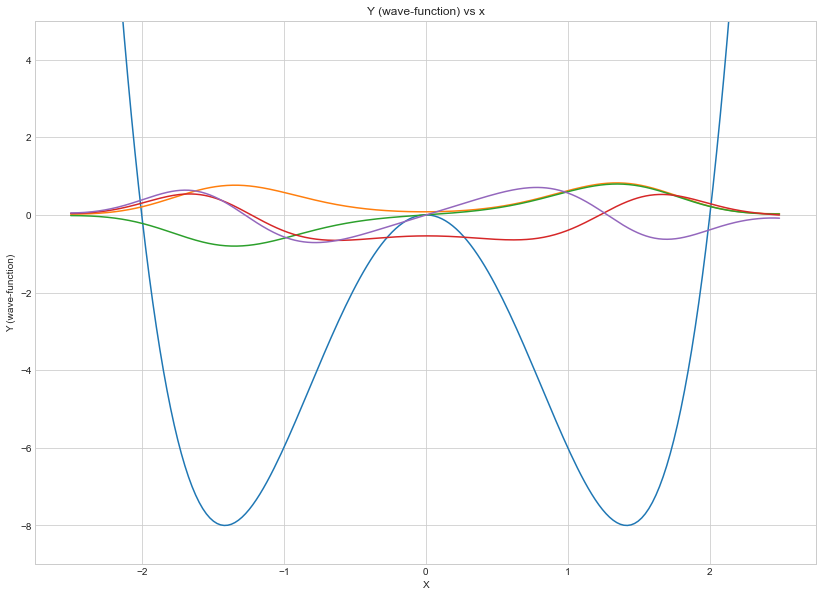

In [103]:
plot_wavefunc_with_V( func_V        = V,
                      axes_wavefunc = axes_doublewell_1_2 + axes_doublewell_3 + axes_doublewell_4,
                      figsize       = (14, 10),
                      rangex_V      = (-2.5, 2.5),
                      ylim          = (-9, 5)
                    )

## Simple Harmonic Oscillator

In [106]:
def V(x):
    return 1/2*(x-2)**2

def d2y(x, y, z):
    return 2*(V(x)-E) * y


i           = 0
E           = 0.5
match ratio = 6.49686526799087e-10


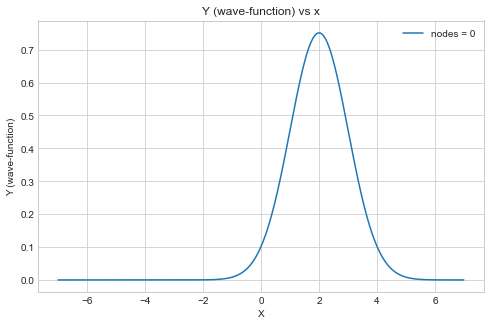


i           = 1
E           = 1.5
match ratio = 1.1357097040587405e-08


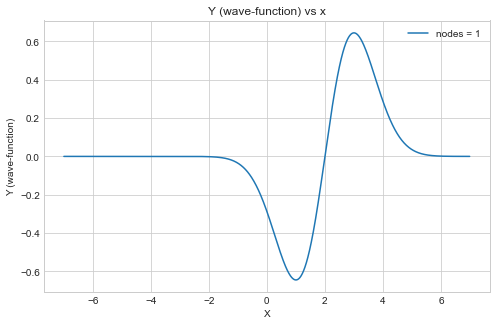


i           = 2
E           = 2.5
match ratio = 2.2422128964638688e-07


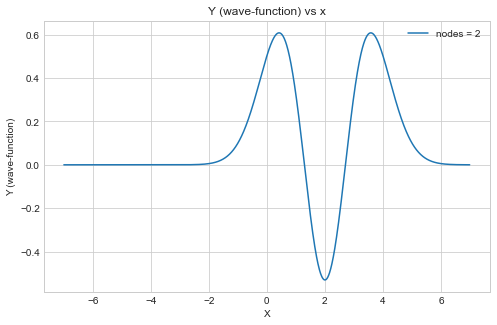


i           = 3
E           = 3.5
match ratio = 6.398755845182791e-06


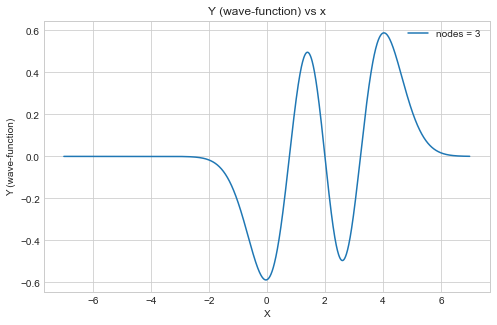

100% |########################################################################|


eigen_values:  [0.5, 1.5, 2.5, 3.5]


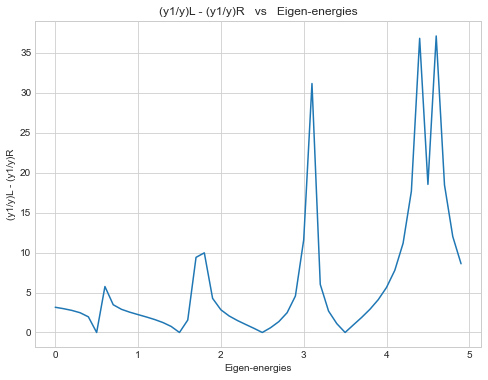

In [107]:
eigen_values, axes_sh = solve_schrod_RK_4th( a    = -7,
                                             b    =  7,
                                             h    = 0.01,
                                             d2y  = d2y,
                                             ya   = 0.0001,
                                             d1ya = 0,
                                             El   = 0,
                                             Eh   = 5,
                                             dE   = 0.1,
                                             match_ratio = 0.01,
                                             normalized = True )
                                             # xlim = None,
                                             # ylim = (0, 10) )

print("eigen_values: ", eigen_values)

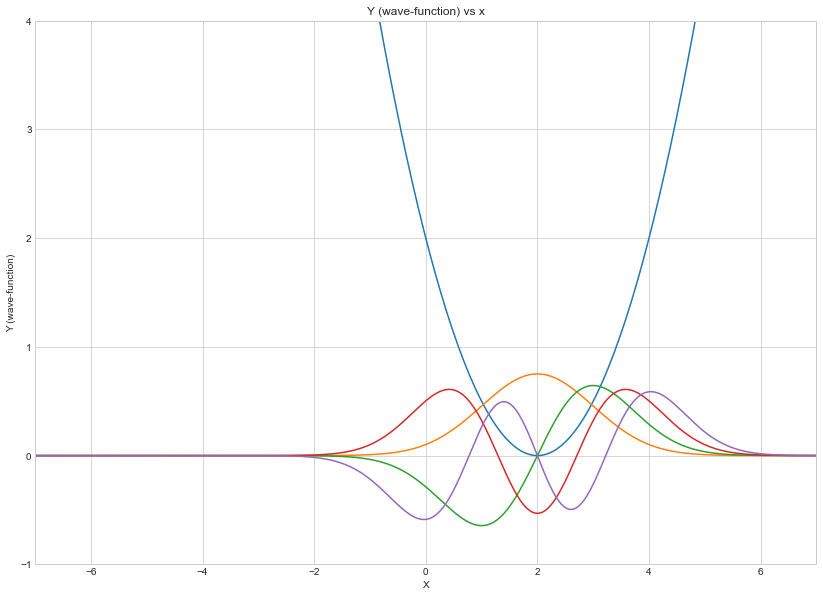

In [108]:
plot_wavefunc_with_V( func_V        = V,
                      axes_wavefunc = axes_sh,
                      figsize       = (14, 10),
                      rangex_V      = (-3, 7),
                      ylim          = (-1, 4),
                      xlim          = (-7, 7)
                    )